# Libraries import

In [1]:
# for Data handling 
import numpy as np
import pandas as pd

# for plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for avoiding warning messages 
import warnings
warnings.filterwarnings('ignore')

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Data reading and understanding

In [2]:
housing = pd.read_csv('train.csv')
print(housing.shape)
housing.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* Data has multiple issue, related to null values and outliers

### Missing value in Housing data

Note, as per Data dictionary :- 
* For 'Alley', Nan means 'No access to alley'.
* For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'.
* For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'.
* For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively.
* MiscFeature - Nan means no additional features mentioned.

In [5]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(housing[mv_categorical_features].isnull().sum())

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      690
Fence           1179
MiscFeature     1406
dtype: int64


In [6]:
# Imputing missing values with "Not_applicable"
housing[mv_categorical_features] = housing[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(housing[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [7]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing.columns:
    if housing[feat].isnull().any():
        print(feat, ':', round(housing[feat].isnull().sum()/housing.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0
MasVnrType : 1.0
MasVnrArea : 1.0
Electrical : 0.0
GarageYrBlt : 6.0
PoolQC : 100.0


In [8]:
# dropping PoolQC as this has very high missing value count
housing.drop(['PoolQC'], axis=1, inplace=True)

# dropping null vaule rows for column MasVnrType and Electrical 
housing = housing[~housing['MasVnrArea'].isnull()]
housing = housing[~housing['Electrical'].isnull()]

# As lotFrontage has around 18% of data missing we cannot drop null rows for lotFrontage.
# rather we will populate null with Median value.
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].median())


In [9]:
# storing numeric and categorical variable in different data frames for seprate analysis on basis of the variable data types

numeric = housing.select_dtypes(include=['int64', 'float64'])
categorical = housing.select_dtypes(include=['object'])

# Numerical Variable Analysis

In [10]:
print(numeric.columns)
print(numeric.shape)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
(1451, 38)


### Outlier analysis

In [11]:
# Caluculating Outlier percent in all numerical variables

outliers_percentage={}

for feature in numeric.columns:
    IQR=numeric[feature].quantile(.75)-numeric[feature].quantile(.25)
    outliers_count=numeric[(numeric[feature]>(numeric[feature].quantile(.75)+1.5*IQR)) | (numeric[feature]<(numeric[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric.shape[0]*100,2)
    
outlier=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.27
10,BsmtFinSF2,11.51
5,OverallCond,8.55
32,ScreenPorch,7.99
2,LotFrontage,7.31
1,MSSubClass,7.10
8,MasVnrArea,6.62
18,BsmtHalfBath,5.65
29,OpenPorchSF,5.17
22,KitchenAbvGr,4.62


To fix outliers we will reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 IQR, 75th percentile + 1.5 IQR]

IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.

Target column 'SalePrice' is excluded in this

In [12]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing[feature].quantile(.75) - housing[feature].quantile(.25) 
        max_value = housing[feature].quantile(.75)+1.5*IQR
        min_value = housing[feature].quantile(.25)-1.5*IQR
        housing[feature][housing[feature] > max_value] = max_value
        housing[feature][housing[feature] < min_value ] = min_value

In [13]:
# Checking the dataset after reassigning minmum and maximum values
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.0,1451.0,1451.0,1451.0,1451.0,1451.000000,1451.000000,1451.000000
mean,729.374225,55.110269,69.067540,9644.201413,6.095107,5.547209,1971.124052,1984.760165,90.254307,438.546864,...,91.960028,42.409373,0.0,0.0,0.0,0.0,0.0,6.319090,2007.815300,180624.101999
std,421.737858,37.534190,17.218492,3596.024635,1.376872,0.964371,30.095316,20.651334,134.950972,432.098564,...,116.711001,52.340021,0.0,0.0,0.0,0.0,0.0,2.700353,1.329376,79312.128273
min,1.000000,20.000000,31.500000,1443.750000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,60.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129900.000000
50%,729.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,381.000000,...,0.000000,24.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,162500.000000
75%,1094.500000,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,707.000000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,107.500000,17693.750000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1767.500000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


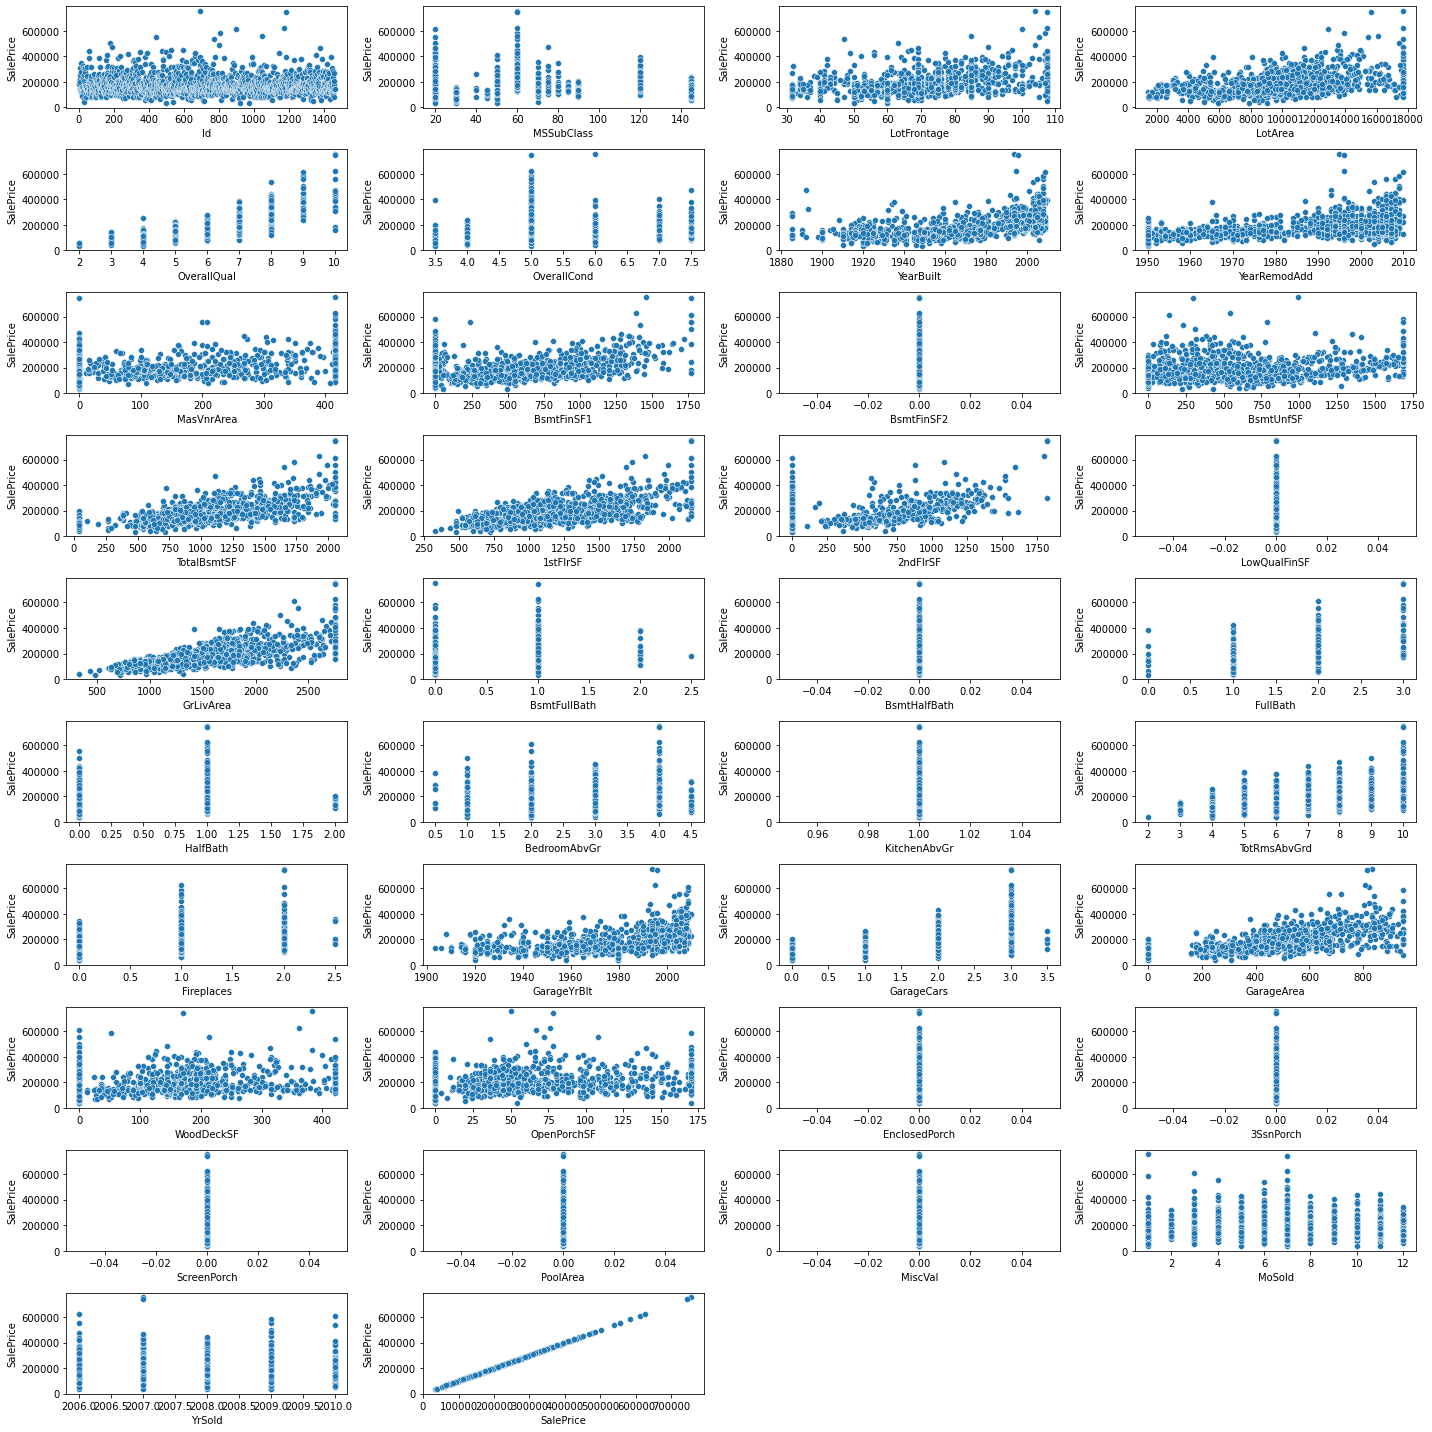

In [14]:
# plotting all the numeric variable gainst target variable SalesPrice

fig=plt.subplots(figsize=(20, 20))
i=1
for feature in numeric.columns:
    plt.subplot(10, 4, i)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housing[feature], housing['SalePrice'])
    plt.tight_layout()
    i=i+1

Observed following from the Above scatter plots


* Following are the single value variable-

'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal'

Will drop single value variable as they do not provide any trend for model

* Following are the Discrete value variable -

'MSSubClass','OverallQual', 'OverallCond','BsmtFullBath','FullBath', 'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars','MoSold', 'YrSold'

Will perform further analysiss on discrete value variables

* Other continous variable show a good liner trend w.r.t SalesPrice

In [15]:
# dropping single value variable as identified above and ID column 

housing.drop(['Id','BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal'], axis=1, inplace=True)
numeric.drop(['Id','BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal'], axis=1, inplace=True)

In [16]:
print(housing.shape,numeric.shape)
housing.columns

(1451, 70) (1451, 28)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Fence', 'MiscFeature',
       'MoSold', 'Y

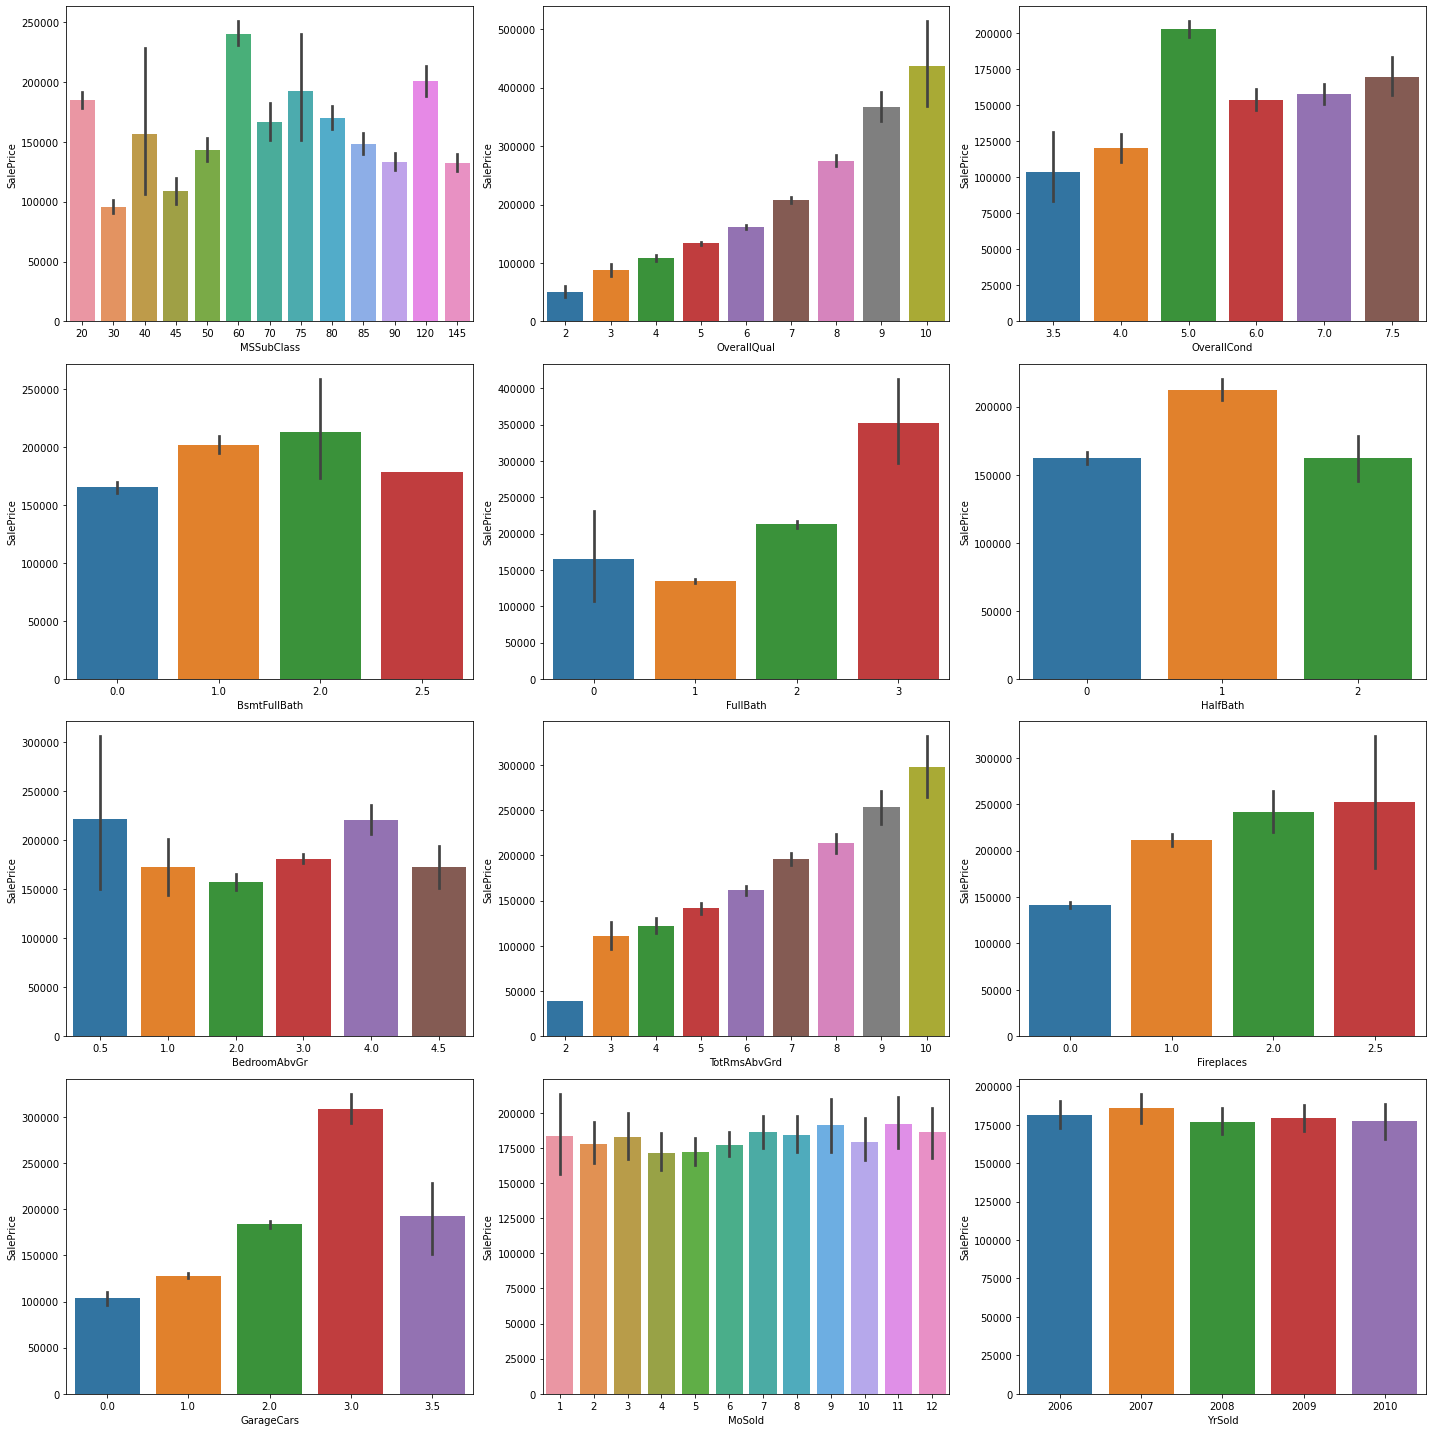

In [17]:
fig=plt.subplots(figsize=(20, 20))
i=1
for feature in numeric[['MSSubClass','OverallQual', 'OverallCond','BsmtFullBath','FullBath', 'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars','MoSold', 'YrSold']]:
    plt.subplot(4, 3, i)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(housing[feature], housing['SalePrice'])
    plt.tight_layout()
    i=i+1

Features such as 'OverallQual', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces' and 'GarageCars' shows a good linear trend with target variable.

Whereas 'MoSold' and 'YrSold does not really add any information.

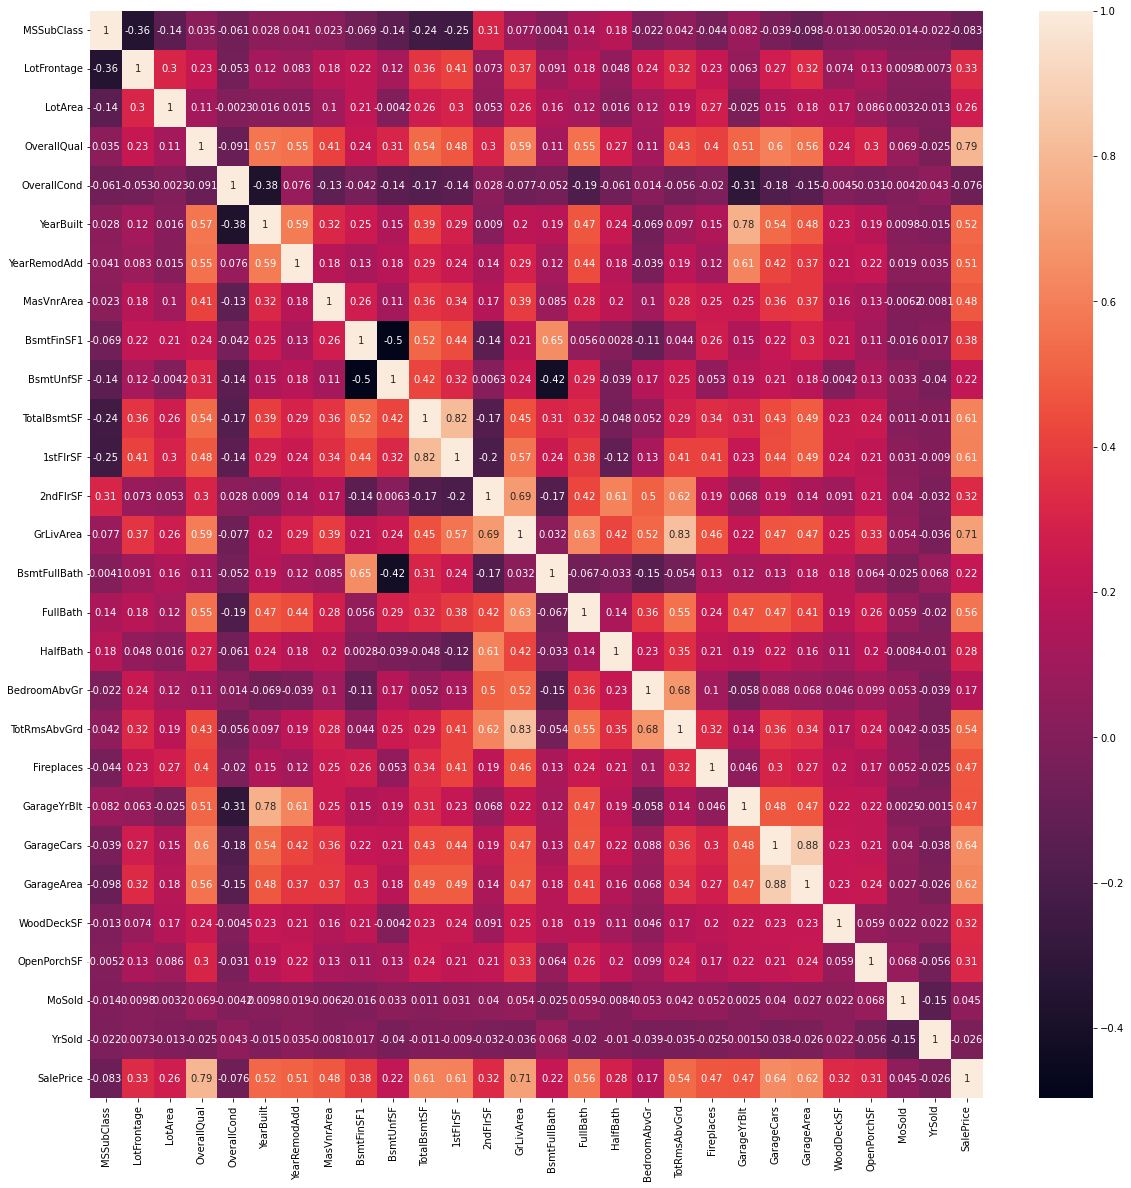

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(numeric.corr(),annot=True)
plt.show()

* YearBuilt and GarageYrBlt has a high co-relation of 0.83
* GarageCars and GarageArea has a high co-relation of 0.88
* TotRmsAbvGrd and GrLivArea has a high co-relation of 0.83
* TotalBsmtSF and 1stflrSF has a high co-relation of 0.82

In [19]:
housing.drop(['GarageYrBlt','GarageCars', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(housing.shape)

(1451, 66)


# Categorical Variable Analysis

In [20]:
print(categorical.columns)
print(categorical.shape)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')
(1451, 42)


### From Data dictonary we have classified Ordered and unordered categorical variable as follows

* Categorical Variables Ordered Features 

'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir'.

* Unordered Features

'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'.

### Visualizing Categorical Variables

In [21]:
# Function to generate boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(8, 3, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(housing['SalePrice'], housing[feature])
        plt.tight_layout()

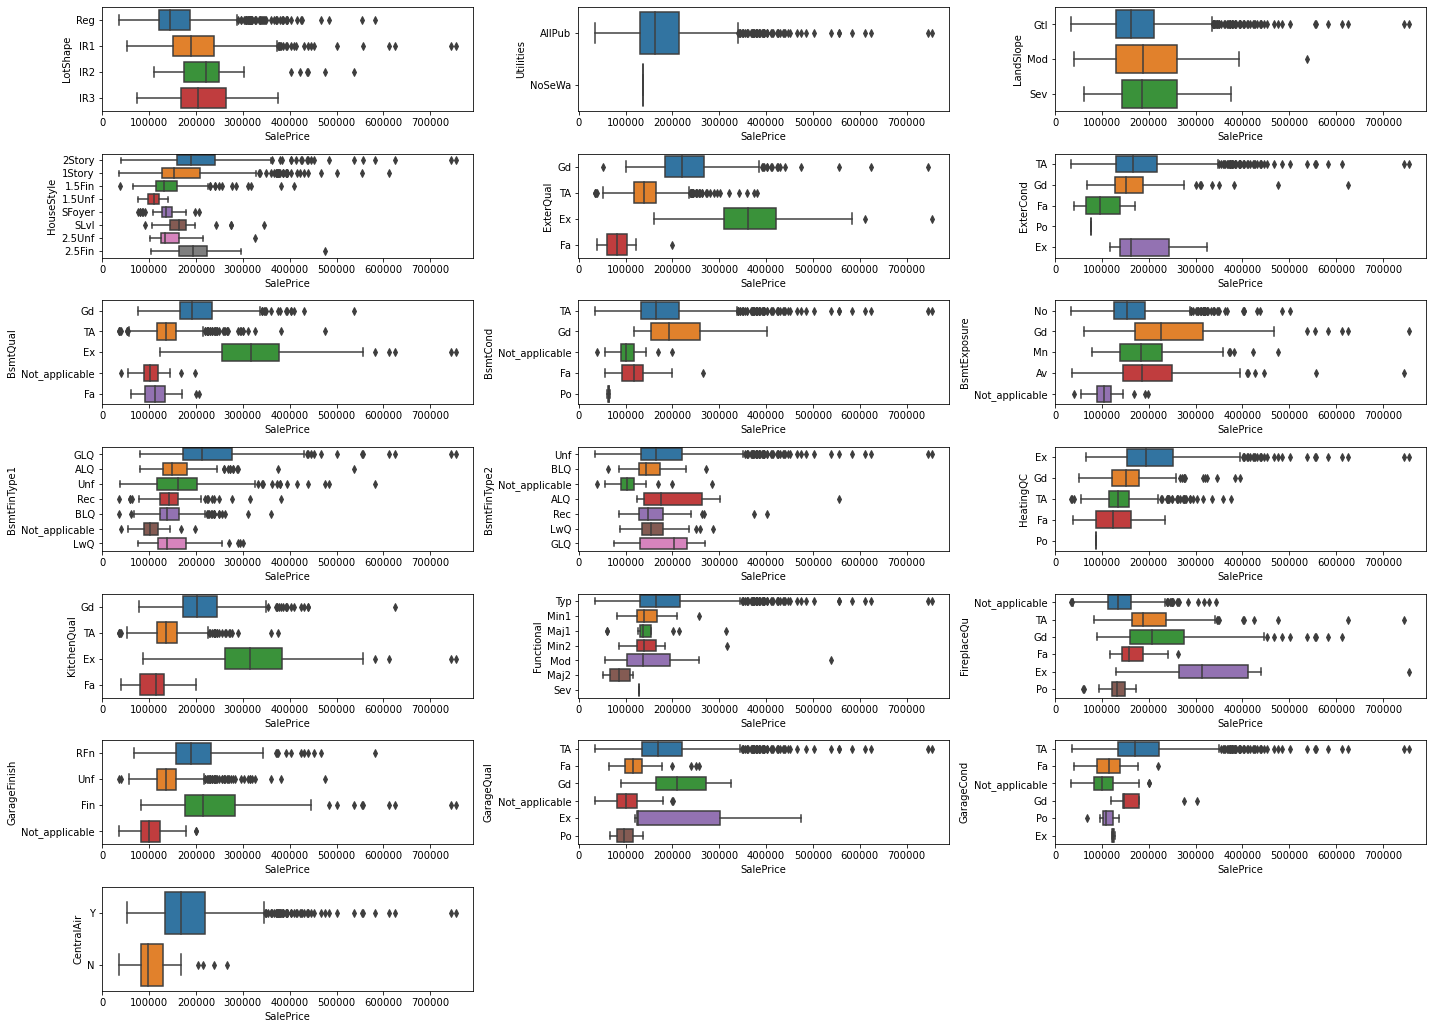

In [22]:
Ordered_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir']

generate_boxplot(Ordered_features)

Observations

* 'LotShape' : Slightly irregular LotShape have the highest SalePrice
* 'Utilities' : Most of the houses in the dataset have all the public utilities
* 'LandSlope' : Houses at severe land slope have lowest SalePrice
* 'HouseStyle' : 2 storied houses have the highest SalePrice
* 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
* 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice
* Houses with excellent quality basement have the highest SalePrice
* Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice
* A lot of houses have unfinished basment or no basement (label = Not_applicable)
* Houses having excellent heating quality and kitchen quality have the highest SalePrice
* Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.
* SalePrice range in largest for houses with average fireplace quality.
* SalePrice is highest where garage is finished.
* The range of SalePrice is widest for Typical/Average Garage quality and condition.
* There are very few houses with excellect condition of garage.

In [23]:
#encoding ordered Categorical features

housing['LotShape'] = housing['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing['Utilities'] = housing['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing['LandSlope'] = housing['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing['HouseStyle'] = housing['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing['ExterQual'] = housing['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['ExterCond'] = housing['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['BsmtQual'] = housing['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtCond'] = housing['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['HeatingQC'] = housing['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['CentralAir'] = housing['CentralAir'].map({'N':0,'Y':1})
housing['KitchenQual'] = housing['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['GarageFinish'] = housing['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing['GarageQual'] = housing['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['GarageCond'] = housing['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['Functional'] = housing['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing['FireplaceQu'] = housing['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

### Visualizing unordered categorical Variable

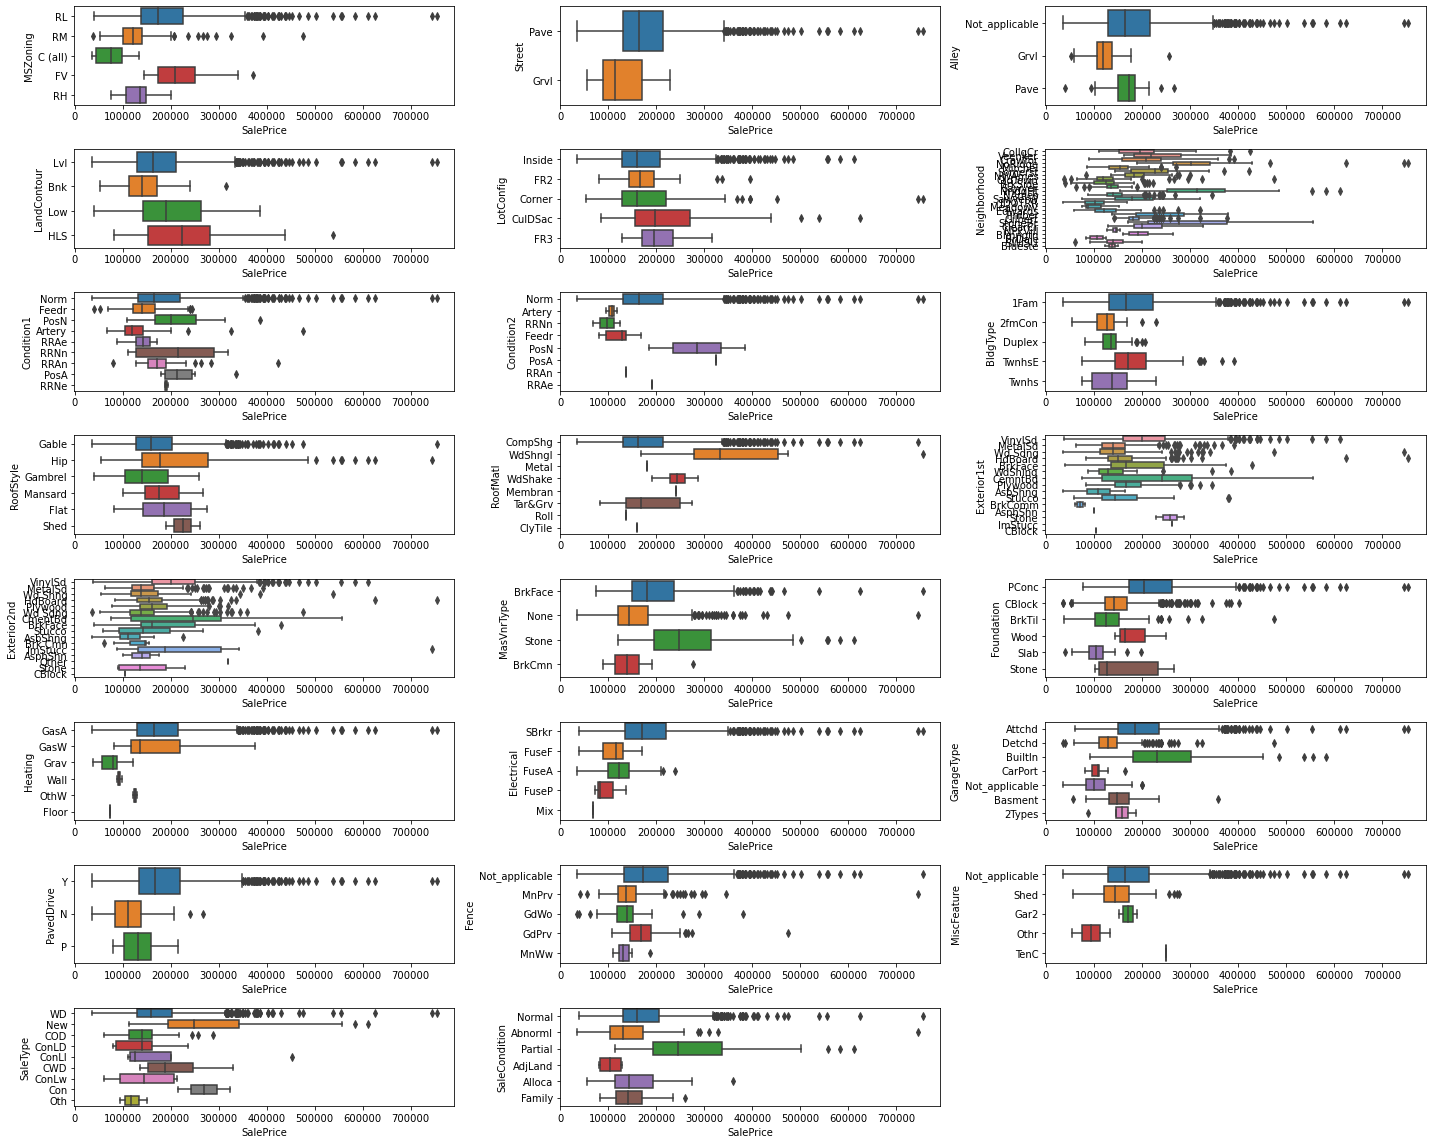

In [24]:
UnOrdered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

generate_boxplot(UnOrdered_features)

Observations
* Most of the houses do not have alley
* Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns
* Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice
* Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
* Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePrice.
* Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price
* Houses with attached and built-in garage have high SalePrice
* Most of the houses do not have fence (Fence= Not_applicable)
* Most of the houses are newly built, houses with warranty deed have high SalePrice
* Sale condition = Normal leads to high SalePrice

In [25]:
#encoding ordered Categorical features with Dummy variable

dummy = pd.get_dummies(housing[UnOrdered_features], drop_first=True)

dummy.shape



(1451, 144)

Adding 144 features to the existing dataset will make the model very complex.

From the above boxplots, for some categorical features only label is dominating over others.

In dummy data frame any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [26]:
dummies_to_drop = []
for feat in dummy.columns:
    if dummy[feat].value_counts()[0]/dummy.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [27]:
# Dropping the highly imbalanced dummy variables

dummy = dummy.drop(dummies_to_drop, axis=1)

print(dummy.shape)

(1451, 52)


In [28]:
# Adding the dummy variables to the original dataframe
housing = pd.concat([housing,dummy],axis=1)

# Dropping the redundant columns
housing = housing.drop(UnOrdered_features,axis=1)

# Data details after cleaning

In [29]:
housing.shape

(1451, 95)

In [30]:
housing.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,55.110269,69.067540,9644.201413,1.940041,2.998622,0.062715,1.655410,6.095107,5.547209,1971.124052,...,0.266713,0.055824,0.917298,0.108201,0.806340,0.962784,0.082012,0.869056,0.822192,0.084080
std,37.534190,17.218492,3596.024635,1.409765,0.052504,0.277045,1.943283,1.376872,0.964371,30.095316,...,0.442393,0.229660,0.275526,0.310741,0.395301,0.189355,0.274478,0.337456,0.382483,0.277603
min,20.000000,31.500000,1443.750000,0.000000,1.000000,0.000000,0.000000,2.000000,3.500000,1885.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7537.500000,0.000000,3.000000,0.000000,0.000000,5.000000,5.000000,1954.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,50.000000,69.000000,9477.000000,3.000000,3.000000,0.000000,1.000000,6.000000,5.000000,1972.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,70.000000,79.000000,11600.000000,3.000000,3.000000,0.000000,3.000000,7.000000,6.000000,2000.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,145.000000,107.500000,17693.750000,3.000000,3.000000,2.000000,7.000000,10.000000,7.500000,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MSSubClass                  1451 non-null   int64  
 1   LotFrontage                 1451 non-null   float64
 2   LotArea                     1451 non-null   float64
 3   LotShape                    1451 non-null   int64  
 4   Utilities                   1451 non-null   int64  
 5   LandSlope                   1451 non-null   int64  
 6   HouseStyle                  1451 non-null   int64  
 7   OverallQual                 1451 non-null   int64  
 8   OverallCond                 1451 non-null   float64
 9   YearBuilt                   1451 non-null   int64  
 10  YearRemodAdd                1451 non-null   int64  
 11  MasVnrArea                  1451 non-null   float64
 12  ExterQual                   1451 non-null   int64  
 13  ExterCond                   1451 

# Splitting into Train and Test Data

In [32]:
X = housing.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,2003,...,0,0,1,0,1,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,7.5,1976,...,0,0,1,0,1,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5.0,2001,...,0,0,1,0,1,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5.0,1915,...,1,0,1,0,1,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,2000,...,0,0,1,0,1,1,0,1,1,0


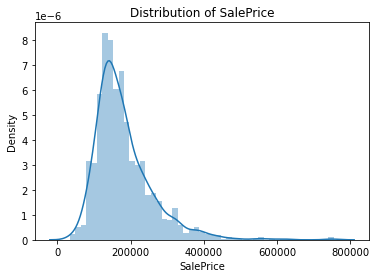

In [33]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing['SalePrice'])
plt.show()

Comment: Since SalePrice is highly right skewed, checking the distribution of transformed SalePrice.

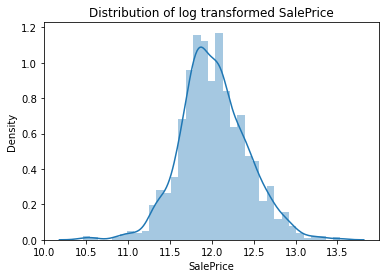

In [34]:
sns.distplot(np.log(housing['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [35]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(housing['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1451, dtype: float64


In [36]:
#Splitting in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1015, 94)
(436, 94)
(1015,)
(436,)


### Variable Scaling

In [38]:
X_train.values

array([[3.000e+01, 4.000e+01, 4.800e+03, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [9.000e+01, 6.900e+01, 7.032e+03, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.200e+02, 6.400e+01, 5.587e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.200e+02, 6.900e+01, 5.271e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+01, 6.000e+01, 1.044e+04, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [6.000e+01, 7.000e+01, 8.400e+03, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

In [39]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [40]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [41]:
# Checking the features after Scaling

print(X_tr_scaled) # train data
print(X_te_scaled) # test data

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.682397    -1.674316 -1.336012  0.752218   0.031404  -0.218261   
1       0.924951     0.000968 -0.711938 -1.382454   0.031404  -0.218261   
2       1.728625    -0.287874 -1.115965 -1.382454   0.031404   3.473991   
3       0.657060     0.925262  1.068574  0.752218   0.031404  -0.218261   
4      -0.950289     0.520883 -0.073046 -1.382454   0.031404  -0.218261   
...          ...          ...       ...       ...        ...        ...   
1010   -0.950289     1.271872  0.753741 -1.382454   0.031404  -0.218261   
1011   -0.950289    -0.056801  2.269119 -1.382454   0.031404  -0.218261   
1012    1.728625     0.000968 -1.204319 -1.382454   0.031404   3.473991   
1013   -0.146614    -0.518948  0.240949  0.752218   0.031404  -0.218261   
1014    0.121277     0.058736 -0.329441  0.752218   0.031404  -0.218261   

      HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Detchd  \
0      -0.863197  

# Initial Feature Selection with RFE

In [42]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    print('-----------------------------------------------------------------------------------')
    return top_n_cols

In [43]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'Exterior1st_HdBoard', 'Exterior2nd_Plywood', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']
-----------------------------------------------------------------------------------
Top 50 features : 
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtExp

In [44]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())   

In [45]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     216.4
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:51:38   Log-Likelihood:                 708.25
No. Observations:                1015   AIC:                            -1325.
Df Residuals:                     969   BIC:                            -1098.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [46]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     196.0
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:51:38   Log-Likelihood:                 713.58
No. Observations:                1015   AIC:                            -1325.
Df Residuals:                     964   BIC:                            -1074.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [47]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     179.2
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:51:39   Log-Likelihood:                 718.57
No. Observations:                1015   AIC:                            -1325.
Df Residuals:                     959   BIC:                            -1049.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Comment: 

By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimal as models with 50 and 55 features have alomost the same adjusted R-squared value on the training data.

In [48]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [49]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

# Ridge Regression

In [50]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.9099171189287079
R2 score (test) :  0.895250021431258
RMSE (train) :  0.12014106308645739
RMSE (test) :  0.12849174751438938


### Comment: 

Ridge Regression model was able to achieve R2 score of 0.89 on test data i.e. 89% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1284 on test data, that means the prediction made by the model can off by 0.1284 unit.

# Lasso Regression

In [51]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9091635236822303
R2 score (test) :  0.8961414555729894
RMSE (train) :  0.12064254111857735
RMSE (test) :  0.1279438396966918


### Comment: 

Lasso Regression model was able to achieve R2 score of 0.89 on test data i.e. 89% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1279 on test data, that means the prediction made by the model can off by 0.1279 unit.

In [52]:
# comparing Ridge and Lasso regression co-efficient

model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=9.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001)
LotArea,0.036023,0.034879
OverallQual,0.088229,0.092563
OverallCond,0.043845,0.044385
YearBuilt,0.021726,0.022907
YearRemodAdd,0.013554,0.013531
BsmtExposure,0.016028,0.014926
BsmtFinType1,0.011220,0.010302
BsmtFinSF1,0.036382,0.032521
BsmtUnfSF,0.016568,0.009870
HeatingQC,0.011891,0.011941


In [53]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[136444 233204 163421 122563 177665]


# Final Model

Lasso Regression produced slightly better R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [54]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)

,Lasso (alpha=0.0001)
1stFlrSF,0.131669
2ndFlrSF,0.113391
OverallQual,0.092563
OverallCond,0.044385
LotArea,0.034879
BsmtFinSF1,0.032521
SaleCondition_Normal,0.030790
SaleType_New,0.029742
MSZoning_RL,0.028499
Neighborhood_Somerst,0.025053


In [55]:
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'LotArea',
       'BsmtFinSF1', 'SaleCondition_Normal', 'SaleType_New', 'MSZoning_RL',
       'Neighborhood_Somerst'],
      dtype='object')

# Summary
* First the housing data is read and analyzed dividing the features into numerical and categorical types.
* SalePrice is the target column here.
* All the features are then analyzed, missing data handling, outlier detection, data cleaning are done. Trend of SalePrice is observed for change in individual features.
* New features are extracted, redundant features dropped and categorical features are encoded accordingly.
* Then the data in split into train and test data and feature scaling is performed.
* Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.
* Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.

* Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method. Optimum alpha = 9.0 for ridge and 0.0001 for lasso model.
* Model evaluation is done with R2 score and Root Mean Square Error.
* Lasso Regression is chosen as final model for having slightly better R-square value on test data.
* Out of 50 features in the final model, top 10 features in order of descending importance are ['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial', 'LotArea', 'BsmtFinSF1','SaleCondition_Normal', 'MSZoning_RL', 'Neighborhood_Somerst']
* Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.124911 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable.
* Predicted value of SalePrice is tranformed into its original scale by performing antilog.

# Subjective Questions Code

In [56]:
# Model Building
ridge_model = Ridge(alpha=18.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=18.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=18.0
R2 score (train) :  0.91
R2 score (test) :  0.8951
RMSE (train) :  0.1201
RMSE (test) :  0.1286


In [57]:
lasso_model = Lasso(alpha=0.0002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.9103
R2 score (test) :  0.8939
RMSE (train) :  0.1199
RMSE (test) :  0.1293


In [58]:
model_coefficients['Ridge (alpha = 18.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.0002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
LotArea,0.036023,0.034879,0.035895,0.034744
OverallQual,0.088229,0.092563,0.088331,0.089879
OverallCond,0.043845,0.044385,0.044001,0.045431
YearBuilt,0.021726,0.022907,0.021995,0.024568
YearRemodAdd,0.013554,0.013531,0.013403,0.012105
BsmtExposure,0.016028,0.014926,0.016055,0.016074
BsmtFinType1,0.011220,0.010302,0.011165,0.010552
BsmtFinSF1,0.036382,0.032521,0.036334,0.035058
BsmtUnfSF,0.016568,0.009870,0.016470,0.014282
HeatingQC,0.011891,0.011941,0.011830,0.011462


In [59]:
model_coefficients.sort_values(by='Lasso (alpha = 0.0002)', ascending=False).head(1)

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
1stFlrSF,0.12341,0.131669,0.124123,0.13135


In [64]:
model_coefficients.sort_values(by='Ridge (alpha = 18.0)', ascending=False).head(1)

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
1stFlrSF,0.12341,0.131669,0.124123,0.13135


In [61]:
# Top 5 featues in Lasso final model

model_coefficients.sort_values(by='Lasso (alpha=0.0001)', ascending=False).head(5)

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
1stFlrSF,0.123410,0.131669,0.124123,0.131350
2ndFlrSF,0.110626,0.113391,0.111261,0.116712
OverallQual,0.088229,0.092563,0.088331,0.089879
OverallCond,0.043845,0.044385,0.044001,0.045431
LotArea,0.036023,0.034879,0.035895,0.034744
